In [1]:
!pip install torch torchvision torchaudio

  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 MB 63.6 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 57.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.1/808.1 kB 44.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 69.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 23.8 MB/s  0:00:00
Using cached typing_extensions-4.15.0-py3-none-any.whl (44 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12/12 [torchaudio]2 [torchvision]


In [2]:
import torch
import sys

print(f"Python Version: {sys.version}")
print(f"PyTorch version: {torch.__version__}")

# Check for Apple Silicon GPU (MPS)
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("✅ MPS (Metal Performance Shaders) is available. Using GPU.")
elif torch.backends.cuda.is_available():
    device = torch.device("cuda")
    print("✅ CUDA is available. (Wait, are you on an Intel Mac with an eGPU?)")
else:
    device = torch.device("cpu")
    print("ℹ️ MPS not available. Using CPU.")

# Create a tensor and move it to the device
x = torch.rand(5, 3).to(device)
print("\nGenerated Tensor on Device:")
print(x)

# Perform a quick operation to verify the hardware is actually computing
y = x @ x.T
print("\nOperation (Matrix Multiplication) successful!")
print(f"Resulting shape: {y.shape}")

Python Version: 3.12.12 (main, Oct  9 2025, 11:07:00) [Clang 17.0.0 (clang-1700.4.4.1)]
PyTorch version: 2.9.1
✅ MPS (Metal Performance Shaders) is available. Using GPU.

Generated Tensor on Device:
tensor([[0.1592, 0.0932, 0.4105],
        [0.5442, 0.7285, 0.4857],
        [0.5430, 0.1635, 0.9615],
        [0.6879, 0.2717, 0.7943],
        [0.2930, 0.0964, 0.3922]], device='mps:0')

Operation (Matrix Multiplication) successful!
Resulting shape: torch.Size([5, 5])


 usando dispositivo: mps
📦 Loading and Engineering Features...
🚀 Starting training on 490000 samples...
Epoch [20/200] | Loss: 0.6557 | Val AUC: 0.6142 | Device: mps:0
Epoch [40/200] | Loss: 0.6371 | Val AUC: 0.6493 | Device: mps:0
Epoch [60/200] | Loss: 0.6187 | Val AUC: 0.6823 | Device: mps:0
Epoch [80/200] | Loss: 0.6092 | Val AUC: 0.6906 | Device: mps:0
Epoch [100/200] | Loss: 0.6059 | Val AUC: 0.6927 | Device: mps:0
Epoch [120/200] | Loss: 0.6046 | Val AUC: 0.6935 | Device: mps:0
Epoch [140/200] | Loss: 0.6039 | Val AUC: 0.6939 | Device: mps:0
Epoch [160/200] | Loss: 0.6035 | Val AUC: 0.6941 | Device: mps:0
Epoch [180/200] | Loss: 0.6032 | Val AUC: 0.6942 | Device: mps:0
Epoch [200/200] | Loss: 0.6030 | Val AUC: 0.6944 | Device: mps:0

✅ FINAL MODEL AUC SCORE: 0.6944


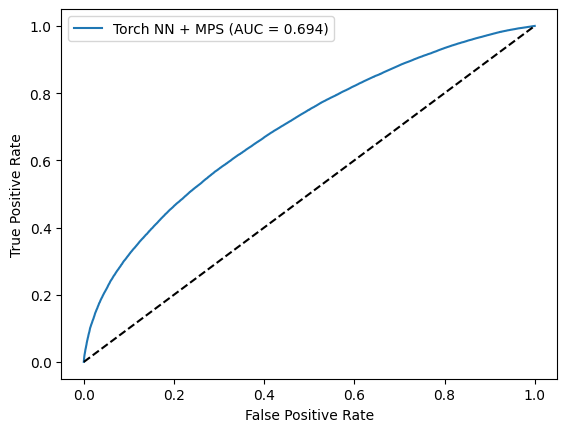

🧪 Generating Risk Percentages for test.csv...
💾 Final predictions saved to: torch_diabetes_predictions.csv
       id  Diabetes_Risk_Percentage
0  700000                 53.160000
1  700001                 58.980000
2  700002                 68.620003
3  700003                 63.349998
4  700004                 81.230003


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve

# ==========================================
# 1. SETUP DEVICE & DATA
# ==========================================
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f" Device used: {device}")

def new_features(df):
    df_eng = df.copy()
    # Adding protection against division by zero with 1e-5
    df_eng['MAP'] = (df_eng['systolic_bp'] + 2 * df_eng['diastolic_bp']) / 3
    df_eng['Cholesterol_Ratio'] = df_eng['cholesterol_total'] / (df_eng['hdl_cholesterol'] + 1e-5)
    return df_eng

print("📦 Loading and Engineering Features...")
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# Apply your feature engineering
train_eng = new_features(train_df)
test_eng = new_features(test_df)

# Define Target and Features
target_col = 'diagnosed_diabetes'
X = train_eng.drop(columns=[target_col])
y = train_eng[target_col].values
X_test_final = test_eng.copy()

# Handle Categoricals (Equivalent to your OneHotEncoder logic)
X = pd.get_dummies(X)
X_test_final = pd.get_dummies(X_test_final)
# Align columns between train and test
X_test_final = X_test_final.reindex(columns=X.columns, fill_value=0)

# Split for local validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale data (StandardScaler is critical for PyTorch)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test_final)

# Convert to Tensors and move to MPS GPU
X_train_t = torch.FloatTensor(X_train_scaled).to(device)
y_train_t = torch.FloatTensor(y_train).reshape(-1, 1).to(device)
X_val_t = torch.FloatTensor(X_val_scaled).to(device)
X_test_t = torch.FloatTensor(X_test_scaled).to(device)

# ==========================================
# 2. DEFINE TORCH MODEL
# ==========================================
class DiabetesNN(nn.Module):
    def __init__(self, input_dim):
        super(DiabetesNN, self).__init__()
        # Deep architecture to handle tabular complexity
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.2), # Prevents overfitting
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid() 
        )
        
    def forward(self, x):
        return self.net(x)

model = DiabetesNN(X_train_t.shape[1]).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

# ==========================================
# 3. TRAINING LOOP (With Logging)
# ==========================================
epochs = 200
print(f"🚀 Starting training on {X_train_t.shape[0]} samples...")

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    
    # Backward pass
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 20 == 0:
        # Check validation AUC during training
        model.eval()
        with torch.no_grad():
            val_preds = model(X_val_t).cpu().numpy()
            current_auc = roc_auc_score(y_val, val_preds)
        print(f"Epoch [{epoch+1}/{epochs}] | Loss: {loss.item():.4f} | Val AUC: {current_auc:.4f} | Device: {outputs.device}")

# ==========================================
# 4. FINAL EVALUATION
# ==========================================
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_val_t).cpu().numpy()
    final_auc = roc_auc_score(y_val, y_pred_probs)

print(f"\n✅ FINAL MODEL AUC SCORE: {final_auc:.4f}")

# Plot ROC
fpr, tpr, _ = roc_curve(y_val, y_pred_probs)
plt.plot(fpr, tpr, label=f'Torch NN + MPS (AUC = {final_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# ==========================================
# 5. TEST PREDICTION & CSV EXPORT
# ==========================================
print("🧪 Generating Risk Percentages for test.csv...")
with torch.no_grad():
    test_outputs = model(X_test_t).cpu().numpy()
    # Convert to percentage
    risk_percentages = (test_outputs * 100).flatten()

# Prepare Submission/Results dataframe
submission = pd.DataFrame()
if 'id' in test_df.columns:
    submission['id'] = test_df['id']

submission['Diabetes_Risk_Percentage'] = np.round(risk_percentages, 2)

# Save to CSV
output_file = 'torch_diabetes_predictions.csv'
submission.to_csv(output_file, index=False)
print(f"💾 Final predictions saved to: {output_file}")
print(submission.head())

🧬 Loading Data and Running Advanced Feature Engineering...
🛡️ Starting 5-Fold Stratified Cross-Validation on 700000 samples...

🚩 PROCESSING FOLD 1/5

🐱 Training CatBoost (Fold 1)...
0:	test: 0.6850945	best: 0.6850945 (0)	total: 153ms	remaining: 3m 48s
200:	test: 0.7075761	best: 0.7075761 (200)	total: 27.1s	remaining: 2m 54s
400:	test: 0.7132863	best: 0.7132863 (400)	total: 55.4s	remaining: 2m 31s
600:	test: 0.7192338	best: 0.7192338 (600)	total: 1m 25s	remaining: 2m 7s
800:	test: 0.7220486	best: 0.7220486 (800)	total: 1m 55s	remaining: 1m 40s
1000:	test: 0.7234586	best: 0.7234586 (1000)	total: 2m 26s	remaining: 1m 12s
1200:	test: 0.7243556	best: 0.7243556 (1200)	total: 2m 58s	remaining: 44.3s
1400:	test: 0.7249945	best: 0.7249945 (1400)	total: 3m 32s	remaining: 15s
1499:	test: 0.7252556	best: 0.7252556 (1499)	total: 3m 49s	remaining: 0us

bestTest = 0.7252555893
bestIteration = 1499


🏎️ Training XGBoost (Fold 1)...
[0]	validation_0-auc:0.60945
[100]	validation_0-auc:0.70918
[200]	val

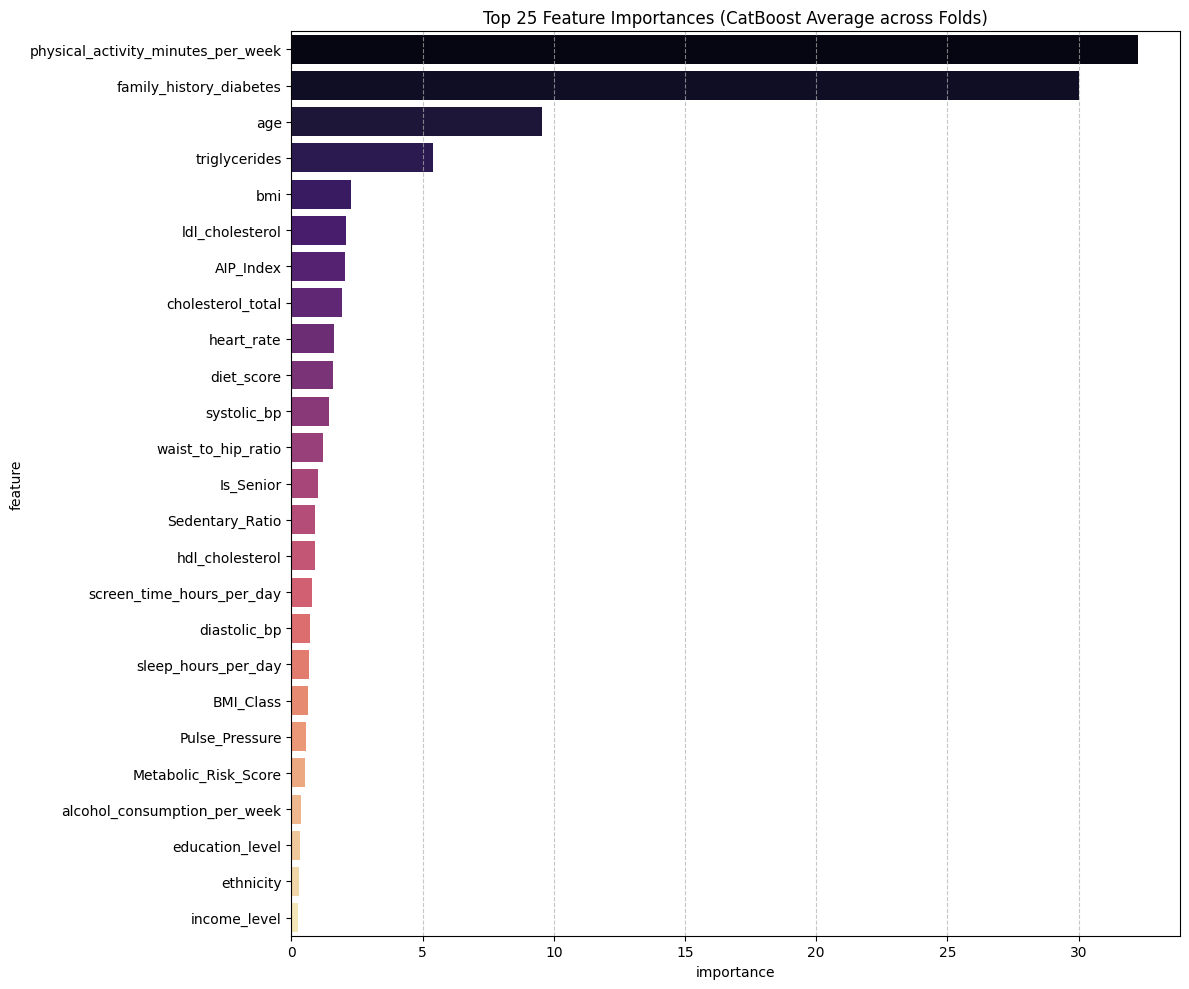


✅ Predictions saved to 'diabetes_final_ensemble_cv.csv'
       id  Diabetes_Risk_Percentage
0  700000                    0.4279
1  700001                    0.5938
2  700002                    0.7111
3  700003                    0.3457
4  700004                    0.8896


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
import warnings

# Suppress warnings for a clean log
warnings.filterwarnings("ignore")

# ==========================================
# 1. ENHANCED MEDICAL FEATURE ENGINEERING
# ==========================================
def super_engineer(df):
    df_eng = df.copy()
    
    # A. AIP (Atherogenic Index of Plasma) - Strong predictor
    df_eng['AIP_Index'] = np.log10(df_eng['triglycerides'] / (df_eng['hdl_cholesterol'] + 1e-5))
    
    # B. Age Buckets (Diabetes risk spikes after 45)
    df_eng['Is_Senior'] = (df_eng['age'] >= 45).astype(int)
    
    # C. BMI Categories (Underweight, Normal, Overweight, Obese)
    df_eng['BMI_Class'] = pd.cut(df_eng['bmi'], bins=[0, 18.5, 25, 30, 100], labels=[0, 1, 2, 3]).astype(int)
    
    # D. Sedentary Index (Screen time relative to physical activity)
    df_eng['Sedentary_Ratio'] = df_eng['screen_time_hours_per_day'] / (df_eng['physical_activity_minutes_per_week'] / 60 + 1)
    
    # E. Metabolic Syndrome Score (Updated Thresholds)
    df_eng['Metabolic_Risk_Score'] = (
        (df_eng['bmi'] > 30).astype(int) + 
        (df_eng['systolic_bp'] > 135).astype(int) + 
        (df_eng['triglycerides'] > 150).astype(int) + 
        (df_eng['hdl_cholesterol'] < 40).astype(int)
    )
    
    # F. Cardiovascular Burden Proxy
    df_eng['Pulse_Pressure'] = df_eng['systolic_bp'] - df_eng['diastolic_bp']
    
    return df_eng

print("🧬 Loading Data and Running Advanced Feature Engineering...")
# Ensure paths are correct for your local setup
train_raw = pd.read_csv('data/train.csv')
test_raw = pd.read_csv('data/test.csv')

train_df = super_engineer(train_raw)
test_df = super_engineer(test_raw)

cat_cols = ['gender', 'ethnicity', 'education_level', 'income_level', 
            'smoking_status', 'employment_status', 'family_history_diabetes', 
            'hypertension_history', 'cardiovascular_history']

# Label Encoding for categorical data
for col in cat_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    test_df[col] = le.transform(test_df[col].astype(str))

X = train_df.drop(columns=['id', 'diagnosed_diabetes'])
y = train_df['diagnosed_diabetes']
X_test = test_df.drop(columns=['id'])

# ==========================================
# 2. 5-FOLD CV WITH REAL-TIME LOGGING
# ==========================================
print(f"🛡️ Starting 5-Fold Stratified Cross-Validation on {len(X)} samples...")

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
val_auc_scores = []
test_preds_cat = np.zeros(len(X_test))
test_preds_xgb = np.zeros(len(X_test))
feature_importances = pd.DataFrame()

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"\n" + "="*40)
    print(f"🚩 PROCESSING FOLD {fold+1}/5")
    print("="*40)
    
    X_t, X_v = X.iloc[train_idx], X.iloc[val_idx]
    y_t, y_v = y.iloc[train_idx], y.iloc[val_idx]
    
    # --- Model 1: CatBoost ---
    print(f"\n🐱 Training CatBoost (Fold {fold+1})...")
    model_cat = CatBoostClassifier(
        iterations=1500,
        learning_rate=0.03,
        depth=7,
        eval_metric='AUC',
        early_stopping_rounds=100,
        auto_class_weights='Balanced',
        verbose=200,             # <--- LOGS EVERY 200 ITERATIONS
        random_seed=fold
    )
    model_cat.fit(X_t, y_t, eval_set=(X_v, y_v), cat_features=cat_cols)
    
    # --- Model 2: XGBoost ---
    print(f"\n🏎️ Training XGBoost (Fold {fold+1})...")
    model_xgb = XGBClassifier(
        n_estimators=1000,
        max_depth=6,
        learning_rate=0.03,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='auc',
        early_stopping_rounds=50,
        random_state=fold
    )
    # verbose=100 logs every 100 rounds
    model_xgb.fit(X_t, y_t, eval_set=[(X_v, y_v)], verbose=100)
    
    # Blending (70% CatBoost / 30% XGBoost)
    p_cat = model_cat.predict_proba(X_v)[:, 1]
    p_xgb = model_xgb.predict_proba(X_v)[:, 1]
    blend = (0.7 * p_cat) + (0.3 * p_xgb)
    
    fold_auc = roc_auc_score(y_v, blend)
    val_auc_scores.append(fold_auc)
    print(f"\n✅ Fold {fold+1} Validation AUC: {fold_auc:.4f}")
    
    # Predictions for test set (Averaging over folds)
    test_preds_cat += model_cat.predict_proba(X_test)[:, 1] / 5
    test_preds_xgb += model_xgb.predict_proba(X_test)[:, 1] / 5
    
    # Track Feature Importance
    fold_importance = pd.DataFrame({'feature': X.columns, 'importance': model_cat.get_feature_importance()})
    feature_importances = pd.concat([feature_importances, fold_importance], axis=0)

print("\n" + "!"*40)
print(f"🔥 FINAL MEAN CV AUC: {np.mean(val_auc_scores):.4f}")
print("!"*40)

# ==========================================
# 3. FEATURE IMPORTANCE CHART
# ==========================================
plt.figure(figsize=(12, 10))
mean_importance = feature_importances.groupby('feature').mean().sort_values(by='importance', ascending=False).reset_index()
sns.barplot(x='importance', y='feature', data=mean_importance.head(25), palette='magma')
plt.title('Top 25 Feature Importances (CatBoost Average across Folds)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ==========================================
# 4. FINAL INFERENCE & SAVE
# ==========================================
final_test_probs = (0.7 * test_preds_cat) + (0.3 * test_preds_xgb)

submission = pd.DataFrame({
    'id': test_raw['id'],
    'Diabetes_Risk_Percentage': np.round(final_test_probs, 4)
})

submission.to_csv('diabetes_final_ensemble_cv.csv', index=False)
print("\n✅ Predictions saved to 'diabetes_final_ensemble_cv.csv'")
print(submission.head())